# Multi-Layer Perceptron

## 1. 데이터 설명

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [2]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
print(digits.target[0])

0


In [4]:
print("# of samples: {}".format(len(digits.images)))

# of samples: 1797


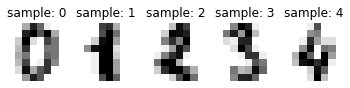

In [5]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('sample: {}'.format(label))

In [6]:
for i in range(5):
    print("labels for index {} image: {}".format(i, digits.target[i]))

labels for index 0 image: 0
labels for index 1 image: 1
labels for index 2 image: 2
labels for index 3 image: 3
labels for index 4 image: 4


In [7]:
digits.images[0].shape

(8, 8)

In [8]:
digits.images.shape

(1797, 8, 8)

In [9]:
digits.data.shape

(1797, 64)

In [10]:
digits.images.reshape((-1, 8 * 8)).shape

(1797, 64)

In [13]:
type(digits.images)

numpy.ndarray

In [14]:
x = digits.data
y = digits.target

In [15]:
print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


## 2. MLP classifier 만들기

In [16]:
import torch
import torch.nn as nn
from torch import optim

In [17]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [18]:
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

In [19]:
loss_fn = nn.CrossEntropyLoss()

In [20]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [21]:
losses = []

In [22]:
for epoch in range(100):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{100} Loss: {loss.item():.8f}")
    
    losses.append(loss.item())


Epoch 0/100 Loss: 2.63789606
Epoch 10/100 Loss: 2.19761133
Epoch 20/100 Loss: 2.03216863
Epoch 30/100 Loss: 1.81180763
Epoch 40/100 Loss: 1.50140655
Epoch 50/100 Loss: 1.12632596
Epoch 60/100 Loss: 0.77107376
Epoch 70/100 Loss: 0.53349841
Epoch 80/100 Loss: 0.39320508
Epoch 90/100 Loss: 0.30826613


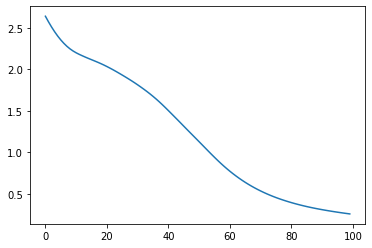

In [23]:
plt.plot(losses)

## 3. Custom Dataset 만들어서 구현하기

In [ ]:
# class CustomDataset(torch.utils.data.Dataset): 
#   def __init__(self):
#   데이터셋의 전처리를 해주는 부분

#   def __len__(self):
#   데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

#   def __getitem__(self, idx): 
#   데이터셋에서 특정 1개의 샘플을 가져오는 함수

In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [ ]:
class DigitsDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
  
    def __len__(self):
        return len(self.x)
  
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    

In [ ]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
).cuda()

In [ ]:
x = torch.tensor(digits.data, dtype=torch.float32)
y = torch.tensor(digits.target,dtype=torch.int64)

In [ ]:
digit_data = DigitsDataset(x, y)

In [ ]:
digit_data_loader =  DataLoader(digit_data, batch_size=32)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
losses = []

In [ ]:
for epoch in range(100):
    epoch_loss = 0
    for x, y in digit_data_loader:
        x = x.cuda()
        y = y.cuda()
        optimizer.zero_grad()
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{100} Cost: {epoch_loss:.6f}")

    losses.append(epoch_loss)

Epoch 0/100 Cost: 101.691337
Epoch 10/100 Cost: 5.388235
Epoch 20/100 Cost: 2.276085
Epoch 30/100 Cost: 1.095667
Epoch 40/100 Cost: 0.458660
Epoch 50/100 Cost: 0.167225
Epoch 60/100 Cost: 0.096277
Epoch 70/100 Cost: 0.058452
Epoch 80/100 Cost: 0.036612
Epoch 90/100 Cost: 0.024393


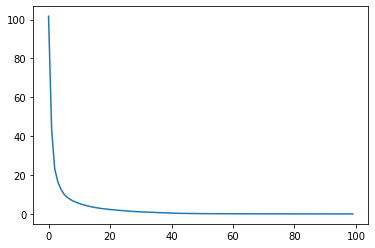

In [ ]:
plt.plot(losses)

## 3. MNIST data와 Class를 이용해서 MLP Classifier 만들기

In [ ]:
import torchvision.datasets as dataset # for loading dataset (mnist)
import torchvision.transforms as transforms # for processing datasets

In [ ]:
# load data
train_data = dataset.MNIST("./", train = True, transform = transforms.ToTensor(), target_transform = None, download = True)
test_data = dataset.MNIST("./", train = False, transform = transforms.ToTensor(), target_transform = None, download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/home/hyunjun/anaconda3/envs/rs/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1631630839582/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
batch_size = 256

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__() # Initializing nn.Module
        self.clf = nn.Sequential(
            nn.Linear(28 * 28, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 10))
    
    def forward(self, x):
        return self.clf(x)

In [ ]:
model = MLP().cuda()

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
for epoch in range(20):
    epoch_loss = 0
    for x, y in train_loader:
        x = x.reshape((-1, 28*28))
        x = x.cuda()
        y = y.cuda()

        optimizer.zero_grad()
        y_pred = model(x)
        loss = loss_fn(y_pred, y)

        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    print(f"Epoch {epoch}/{20} Cost: {epoch_loss / len(train_loader):.6f}")
    losses.append(epoch_loss / len(train_loader))

Epoch 0/20 Cost: 0.913687
Epoch 1/20 Cost: 0.319754
Epoch 2/20 Cost: 0.263310
Epoch 3/20 Cost: 0.229467
Epoch 4/20 Cost: 0.205629
Epoch 5/20 Cost: 0.187720
Epoch 6/20 Cost: 0.171439
Epoch 7/20 Cost: 0.157779
Epoch 8/20 Cost: 0.146876
Epoch 9/20 Cost: 0.136566
Epoch 10/20 Cost: 0.127757
Epoch 11/20 Cost: 0.119790
Epoch 12/20 Cost: 0.114487
Epoch 13/20 Cost: 0.107377
Epoch 14/20 Cost: 0.102032
Epoch 15/20 Cost: 0.096906
Epoch 16/20 Cost: 0.092663
Epoch 17/20 Cost: 0.088528
Epoch 18/20 Cost: 0.083996
Epoch 19/20 Cost: 0.081206


In [ ]:
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad():
    for imges, labels in test_loader:
        imges = imges.reshape( (-1, 28 * 28)).cuda()
        labels = labels.cuda()

        output = model(imges)
        _, prediction_idx = torch.max(output, 1)

        prediction_list.append(prediction_idx)
        label_list.append(label)

        total += labels.size(0)
        correct += (prediction_idx == labels).sum().float()
    print("Accuracy: {}".format(correct/total))

Accuracy: 0.9646999835968018


### Regularization

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)